In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load the dataset
df = pd.read_csv('sales_data_sample.csv',encoding='unicode_escape')

# Display the first few rows
print(df.head())
print(df.info())
df

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [46]:
# Selecting relevant features for clustering
# Choose numerical features for clustering; adjust based on dataset structure
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
data_clustering = df[numerical_columns].dropna()  # Drop NaNs for simplicity


In [47]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Using the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


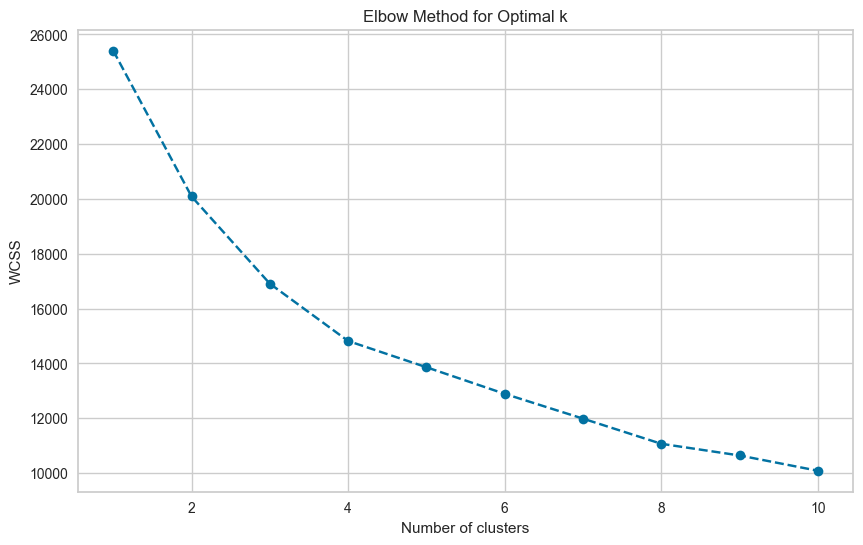

In [48]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# From the elbow plot, determine the optimal number of clusters
# Fit the KMeans model with the optimal number of clusters
optimal_clusters = 4  # Replace with the observed optimal number from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)


In [50]:
# Add cluster labels to the dataset
data_clustering['Cluster'] = clusters


In [51]:
data_clustering

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Cluster
0,10107,30,95.70,2,2871.00,1,2,2003,95,2
1,10121,34,81.35,5,2765.90,2,5,2003,95,2
2,10134,41,94.74,2,3884.34,3,7,2003,95,2
3,10145,45,83.26,6,3746.70,3,8,2003,95,1
4,10159,49,100.00,14,5205.27,4,10,2003,95,1
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,4,12,2004,54,3
2819,10373,29,100.00,1,3978.51,1,1,2005,54,0
2820,10386,43,100.00,4,5417.57,1,3,2005,54,0
2821,10397,34,62.24,1,2116.16,1,3,2005,54,0


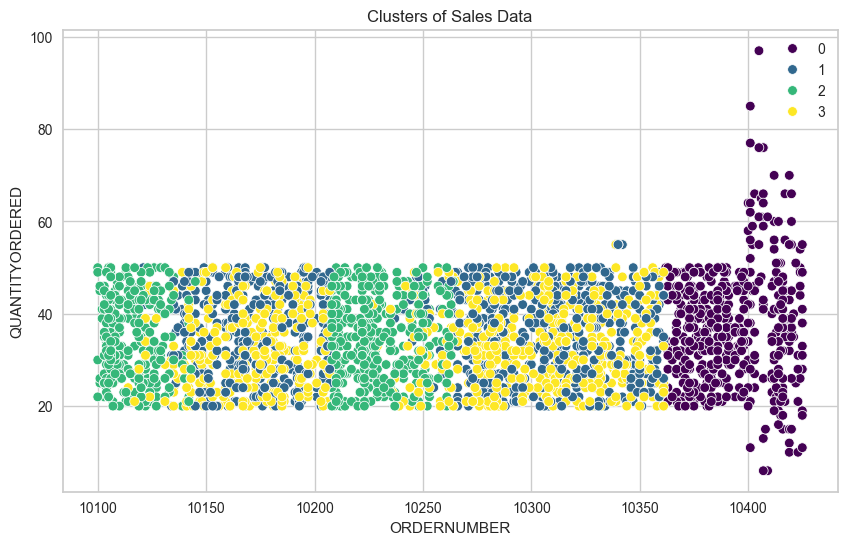

In [52]:
# Visualize clusters (for first two features as an example)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clustering.iloc[:, 0], y=data_clustering.iloc[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters of Sales Data')
plt.xlabel(data_clustering.columns[0])
plt.ylabel(data_clustering.columns[1])
plt.show()

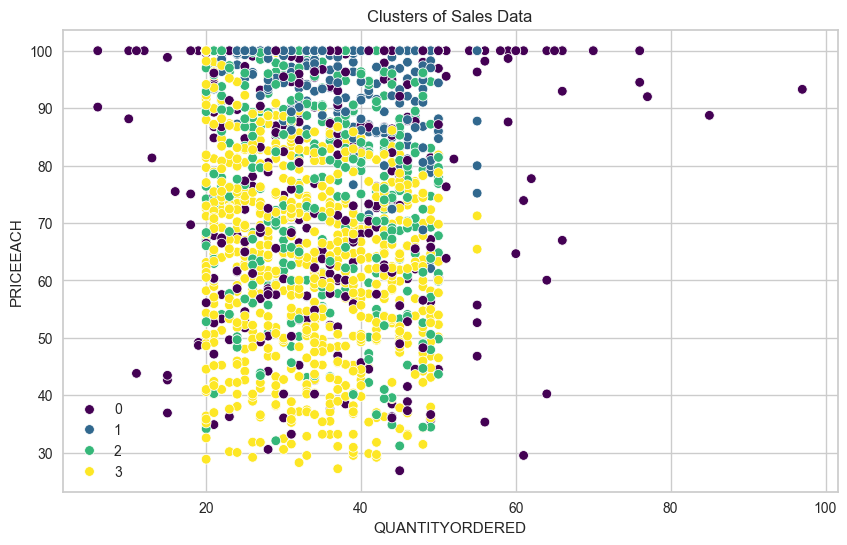

In [53]:
# Visualize clusters (for first two features as an example)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clustering.iloc[:, 1], y=data_clustering.iloc[:, 2], hue=clusters, palette='viridis')
plt.title('Clusters of Sales Data')
plt.xlabel(data_clustering.columns[1])
plt.ylabel(data_clustering.columns[2])
plt.show()

In [54]:
data_clustering.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP', 'Cluster'],
      dtype='object')

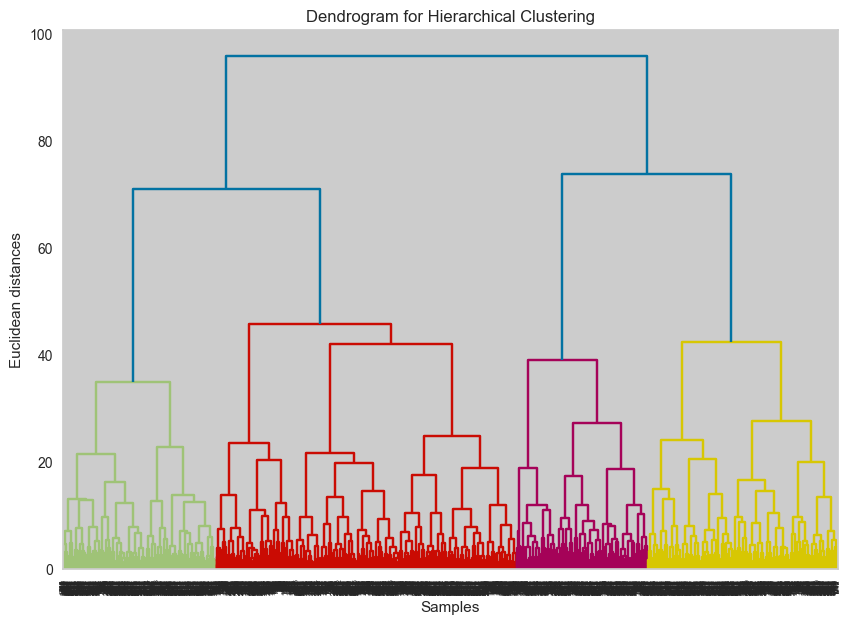

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
linked = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()